<a href="https://colab.research.google.com/github/harbidel/Temperature---Resistance-using-Neural-Network/blob/main/Temp_Res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd


In [2]:
data = pd.read_excel('/content/Thermistor data set.xlsx') 
data.head()

,T,R,Tth,Vth
0,-50,329.5,-44.332497,0.147275
1,-45,247.7,-39.904572,0.194024
2,-40,188.5,-35.502895,0.251889
3,-35,144.1,-31.009028,0.324465
4,-30,111.3,-26.524332,0.412201


In [3]:
# Define the training data
temp = data.iloc[:, 0].values.reshape(-1, 1)
resistance = data.iloc[:, 1].values.reshape(-1, 1)

In [4]:
# Split the data into training and testing sets
num_samples = len(temp)
indices = np.random.permutation(num_samples)
train_indices = indices[:int(num_samples * 0.8)]
test_indices = indices[int(num_samples * 0.8):]
train_temp, train_resistance = temp[train_indices], resistance[train_indices]
test_temp, test_resistance = temp[test_indices], resistance[test_indices]

In [5]:
# Define the neural network model
inputs = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)


In [6]:
# Define the loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [7]:
# Train the model using backpropagation
for epoch in range(500):
    with tf.GradientTape() as tape:
        predictions = model(train_resistance)
        loss = loss_fn(train_temp, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    if epoch % 50 == 0:
        print(f'Epoch {epoch}: Loss={loss.numpy()}')


Epoch 0: Loss=3198.71875
Epoch 50: Loss=2903.002197265625
Epoch 100: Loss=1402.51953125
Epoch 150: Loss=702.1481323242188
Epoch 200: Loss=329.5525207519531
Epoch 250: Loss=161.22413635253906
Epoch 300: Loss=119.39962768554688
Epoch 350: Loss=110.40225219726562
Epoch 400: Loss=97.65025329589844
Epoch 450: Loss=95.15327453613281


In [8]:
# Evaluate the model on the testing data
test_predictions = model.predict(test_resistance)
test_loss = loss_fn(test_temp, test_predictions).numpy()
print(f'Test loss: {test_loss}')

1/1 [==============================] - 0s 137ms/step
Test loss: 117.65966796875


In [12]:
# Print the predicted resistance for the test data
print('Predicted Temperature for test data:')
for i in range(len(test_resistance)):
    print(f'Resistance: {test_resistance[i]}, Predicted Temperature: {test_predictions[i][0]}')

Predicted Temperature for test data:
Resistance: [188.5], Predicted Temperature: -34.139732360839844
Resistance: [17.96], Predicted Temperature: 1.1158981323242188
Resistance: [12.09], Predicted Temperature: 2.329397201538086
Resistance: [33.9], Predicted Temperature: -2.1793594360351562
Resistance: [2.228], Predicted Temperature: 80.40522003173828
Resistance: [2.588], Predicted Temperature: 76.63277435302734
Resistance: [3.02], Predicted Temperature: 72.10584259033203


In [18]:
print(test_resistance.shape)
print(test_temp.shape)

(7, 1)
(7, 1)


In [19]:
test_resistance = np.reshape(test_resistance, (-1,))
test_temp = np.reshape(test_temp, (-1,))

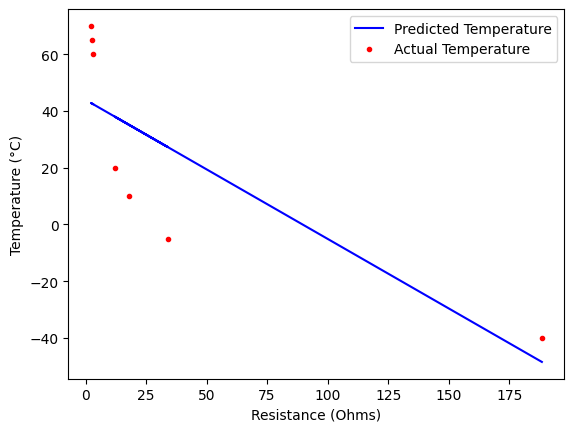

In [20]:
import matplotlib.pyplot as plt

# Calculate the slope and intercept of the straight line
slope, intercept = np.polyfit(test_resistance, test_temp, 1)

# Plot the predicted temperature for the test data as a straight line
plt.plot(test_resistance, slope * test_resistance + intercept, 'b-', label='Predicted Temperature')

# Plot the actual temperature for the test data
plt.plot(test_resistance, test_temp, 'r.', label='Actual Temperature')

plt.xlabel('Resistance (Ohms)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()
